# Лабораторная работа №3
15-В-1 Ляляев Никита
Вариант 7

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('airfoil_self_noise.dat.txt', sep="\t", header=None, 
                   names = ["Frequency","Angle of attack","Chord length","Free-stream velocity","displacement thickness","Scaled sound pressure level"])

In [21]:
df.head()


,Frequency,Angle of attack,Chord length,Free-stream velocity,displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
набор данных представляет собой различные профили и размеры крыльев самолётов NASA
на различных скоростях, углах аттаки, аэродинамеческих туннелях
Столбцы:
Frequency - Частота, в Герцах.
Angle of attack - Угол атаки, в градусах.
Chord length - Длина хорды, в метрах
Free-stream velocity - Скорость набегающего потока, в метрах в секунду.
displacement thickness - величина смещения со стороны забора воздуха.
Scaled sound pressure level - Масштабируемый уровень звукового давления, в децибелах.

# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [22]:
df.shape

(1503, 6)

In [23]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(1503, 6)

# 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [24]:

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'displacement thickness', 'Scaled sound pressure level']
categorial:  []


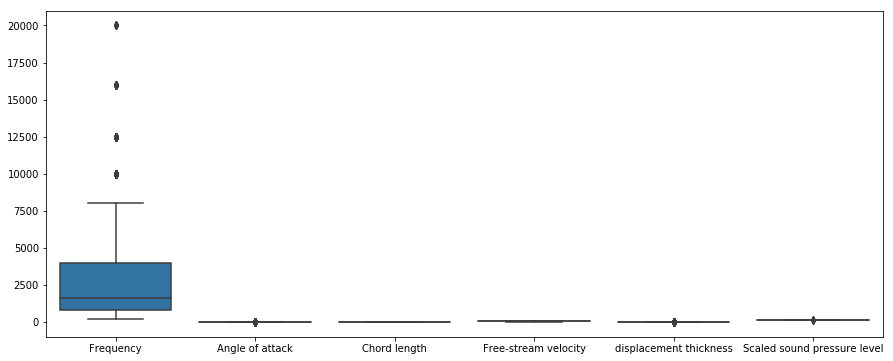

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numerical_columns])
plt.show()


# 4.Выполните замену категориальных признаков

Их нет

# 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

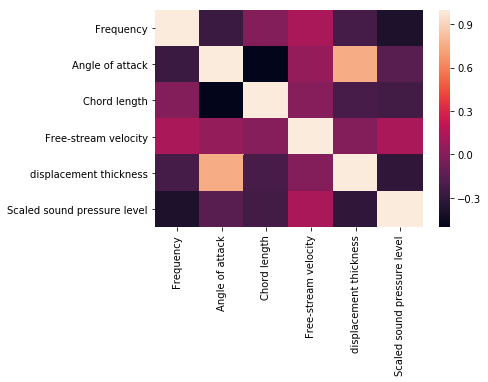

In [26]:

df_corr = df.corr()
sns.heatmap(df_corr)
plt.show()

In [27]:
df_corr


,Frequency,Angle of attack,Chord length,Free-stream velocity,displacement thickness,Scaled sound pressure level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Scaled sound pressure level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


# 6. Заполните пропущенные значения в данных

In [28]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                      1503 non-null int64
Angle of attack                1503 non-null float64
Chord length                   1503 non-null float64
Free-stream velocity           1503 non-null float64
displacement thickness         1503 non-null float64
Scaled sound pressure level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


пропусков нет

# 7. Решите поставленную задачу регрессии в соответствии с заданием.

In [29]:
# Линейная регрессия, LASSO регуляризатор.
X, y = df.drop(['displacement thickness'], axis=1), df['displacement thickness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
xt = reg.predict(X_test)
print(xt[:10])

[ 0.01339228  0.0125929   0.01141735  0.01000668  0.00906624  0.0130161
  0.01282801  0.01329823  0.01339228  0.0125929 ]


In [31]:
print(xt[:10]-y_test[:10])

51      0.010080
1465   -0.029283
184     0.005621
1000    0.009567
746     0.008304
1032    0.012109
925    -0.016157
394     0.002858
597     0.005872
588     0.007338
Name: displacement thickness, dtype: float64


In [32]:
reg.intercept_

0.013768454706641082

In [33]:
# Линейная регрессия без использования регуляризаторов;
X, y = df.drop(['displacement thickness'], axis=1), df['displacement thickness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
reg.intercept_

0.05220204131071262

In [35]:
corr={}
corr['pearson'], _ = pearsonr(xt,y_test)
corr['spearman'], _ = spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.208086677994
0.339278023413
